# Alternation index

In [1]:
import sys

sys.path.append('../src')

In [2]:
from Utils.indices import AlternationIndex

In [3]:
index_gen = AlternationIndex(
    num_points=100,
    num_episodes=100,
    max_agents=12,
    max_epsilon=0.05,
    seed=42,
    fancy_2P=True
)

In [ ]:
df = index_gen.simulate_data()

In [5]:
df = index_gen.data
print(df['data_type'].value_counts(normalize=True))
df.head()

data_type
alternation     0.279330
segmentation    0.279330
random          0.279330
mixed           0.162011
Name: proportion, dtype: float64


,threshold,num_agents,id_sim,bounded_efficiency,inequality,epsilon,data_type
0,0.285714,7,7-0.2857142857142857-0.016666666666666666-alte...,0.860,0.028785,0.016667,alternation
1,0.285714,7,7-0.2857142857142857-0.016666666666666666-alte...,0.755,0.009759,0.016667,alternation
2,0.285714,7,7-0.2857142857142857-0.016666666666666666-alte...,0.730,0.031320,0.016667,alternation
3,0.285714,7,7-0.2857142857142857-0.016666666666666666-alte...,0.840,0.035119,0.016667,alternation
4,0.285714,7,7-0.2857142857142857-0.016666666666666666-alte...,0.735,0.016330,0.016667,alternation


In [6]:
index_gen.create_index_sklearn()

/Users/edgar/virtualenvs/venv-3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

 alternation       0.87      0.94      0.90      2000
       mixed       0.81      0.75      0.78      1160
      random       0.80      0.76      0.77      2000
segmentation       0.86      0.88      0.87      2000

    accuracy                           0.84      7160
   macro avg       0.83      0.83      0.83      7160
weighted avg       0.84      0.84      0.84      7160

             bounded_efficiency inequality intercept
target                                              
alternation            1.112379 -12.992534  4.120664
mixed                  2.964513   3.390352 -2.644867
random                -1.955044   2.351441  2.098665
segmentation          -2.121848   7.250741 -3.574462
Saved sklearn coefficients to /Users/edgar/Documents/GitHub/Cognitive_Models_El_Farol_Bar_Problem/data/indices/sklearn_coefficients.pkl


In [7]:
index_gen.create_index_mlp()

[001/250] loss = 0.6347
[025/250] loss = 0.2801
[050/250] loss = 0.2752
[075/250] loss = 0.2709
[100/250] loss = 0.2692
[125/250] loss = 0.2695
[150/250] loss = 0.2672
[175/250] loss = 0.2675
[200/250] loss = 0.2658
[225/250] loss = 0.2668
[250/250] loss = 0.2643

Test performance:
              precision    recall  f1-score   support

 alternation     0.8907    0.9450    0.9170      2000
       mixed     0.8455    0.8819    0.8633      1160
      random     0.8906    0.7775    0.8302      2000
segmentation     0.9078    0.9450    0.9260      2000

    accuracy                         0.8880      7160
   macro avg     0.8836    0.8873    0.8841      7160
weighted avg     0.8881    0.8880    0.8866      7160



In [8]:
index_gen.create_index_cnn()

Preparing training data...
[001/150] loss = 0.4347
[015/150] loss = 0.0812
[030/150] loss = 0.0393
[045/150] loss = 0.0227
[060/150] loss = 0.0203
[075/150] loss = 0.0155
[090/150] loss = 0.0161
[105/150] loss = 0.0116
[120/150] loss = 0.0151
[135/150] loss = 0.0139
[150/150] loss = 0.0114

Test performance:
              precision    recall  f1-score   support

 alternation     0.9426    0.9605    0.9515      2000
       mixed     0.9343    0.9440    0.9391      1160
      random     0.9502    0.9260    0.9380      2000
segmentation     0.9920    0.9925    0.9923      2000

    accuracy                         0.9571      7160
   macro avg     0.9548    0.9557    0.9552      7160
weighted avg     0.9572    0.9571    0.9571      7160



In [9]:
index_gen1 = AlternationIndex.from_file(priority='mlp')
df['alternation_index1'] = index_gen1(df)
df['segmentation_index1'] = index_gen1.calculate_probabilities('segmentation', df)
df['predicted_class1'] = index_gen1.classify(df)
print(df['predicted_class1'].value_counts(normalize=True))

predicted_class1
random          0.397905
alternation     0.242486
segmentation    0.238939
mixed           0.120670
Name: proportion, dtype: float64


In [10]:
index_gen2 = AlternationIndex.from_file(priority='sklearn')
df['alternation_index2'] = index_gen2(df)
df['segmentation_index2'] = index_gen2.calculate_probabilities('segmentation', df)
df['predicted_class2'] = index_gen2.classify(df)
print(df['predicted_class2'].value_counts(normalize=True))

predicted_class2
random          0.478073
alternation     0.249246
segmentation    0.218743
mixed           0.053939
Name: proportion, dtype: float64


In [11]:
df_full = index_gen.full_data
index_gen3 = AlternationIndex.from_file(priority='cnn')
df['alternation_index3'] = index_gen3(df_full)
df['segmentation_index3'] = index_gen3.calculate_probabilities('segmentation', df_full)
df['predicted_class3'] = index_gen3.classify(df_full)
print(df['predicted_class3'].value_counts(normalize=True))

predicted_class3
alternation     0.279721
segmentation    0.279302
random          0.279190
mixed           0.161788
Name: proportion, dtype: float64


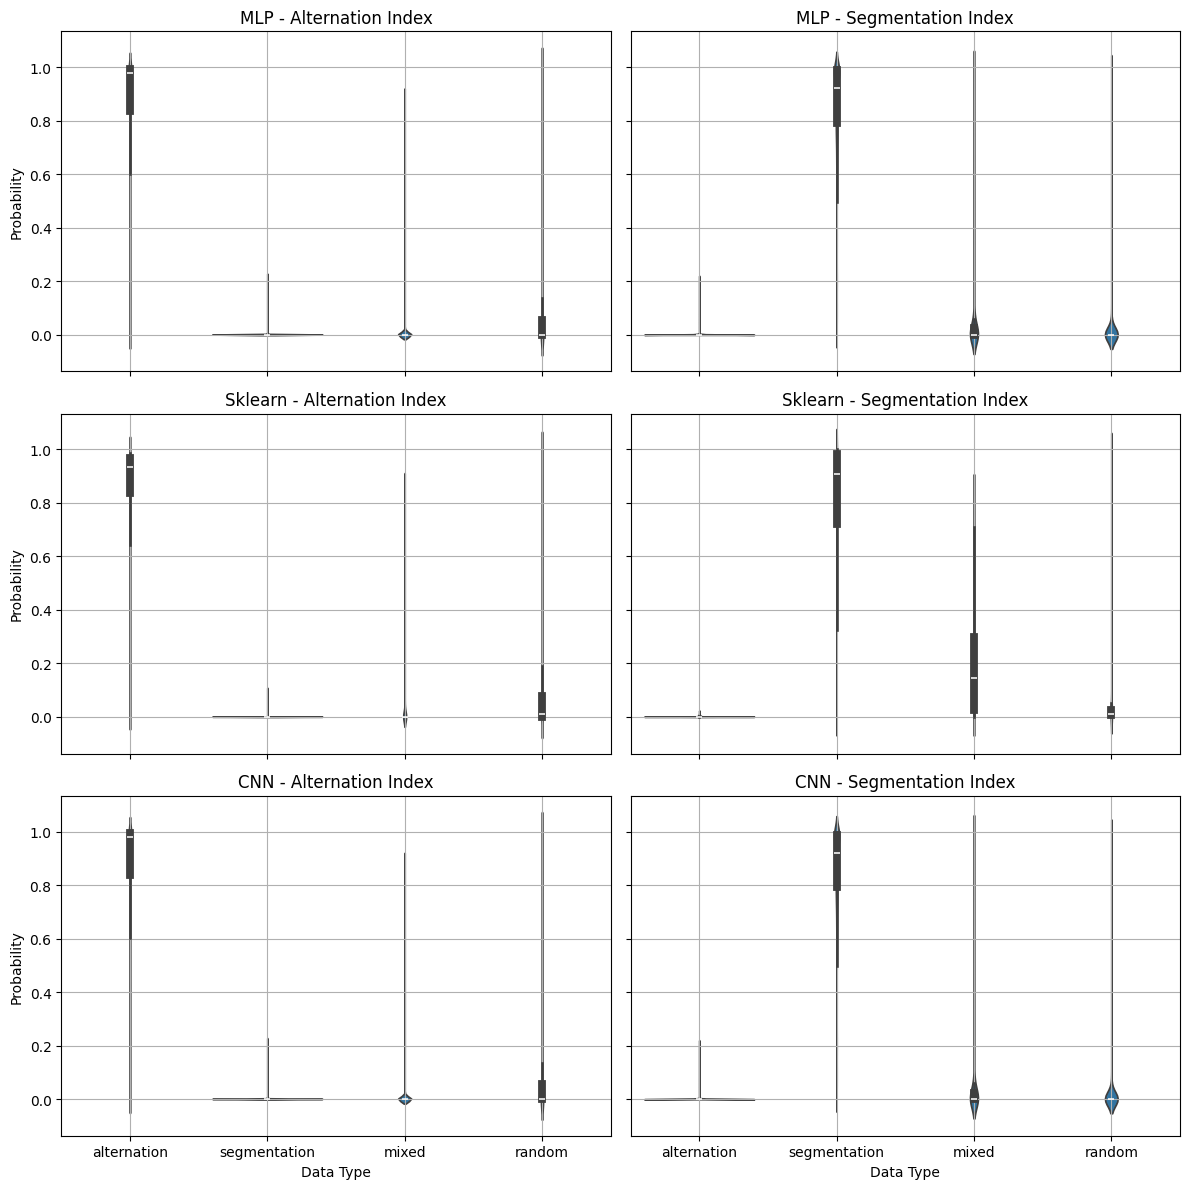

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

from Utils.utils import Grid

grid = Grid(6, vertical=True)
fig, axes = plt.subplots(
    3, 2, 
    figsize=(12, 12),
    tight_layout=True,
    sharex=True, sharey=True
)

# MLP
sns.violinplot(
    data=df,
    x='data_type',
    y='alternation_index1',
    ax=axes[0, 0],
)
axes[0, 0].set_title('MLP - Alternation Index')

sns.violinplot(
    data=df,
    x='data_type',
    y='segmentation_index1',
    ax=axes[0, 1],
)
axes[0, 1].set_title('MLP - Segmentation Index')

# Sklearn
sns.violinplot(
    data=df,
    x='data_type',
    y='alternation_index2',
    ax=axes[1, 0],
)
axes[1, 0].set_title('Sklearn - Alternation Index')

sns.violinplot(
    data=df,
    x='data_type',
    y='segmentation_index2',
    ax=axes[1, 1],
)
axes[1, 1].set_title('Sklearn - Segmentation Index')

# CNN
sns.violinplot(
    data=df,
    x='data_type',
    y='alternation_index1',
    ax=axes[2, 0],
)
axes[2, 0].set_title('CNN - Alternation Index')

sns.violinplot(
    data=df,
    x='data_type',
    y='segmentation_index1',
    ax=axes[2, 1],
)
axes[2, 1].set_title('CNN - Segmentation Index')


for r, c in grid:
    axes[r, c].set_xlabel('Data Type')
    axes[r, c].set_ylabel('Probability')
    axes[r, c].grid()


---

In [13]:
import pandas as pd

conditional_entropy = 0.427327	
entropy = 0.477217	
efficiency = 0.5
bounded_efficiency = 1
inequality =0.176777
df_test = pd.DataFrame({
    'bounded_efficiency': [bounded_efficiency],
    'entropy': [entropy],
    'conditional_entropy': [conditional_entropy],
    'inequality': [inequality]
})
print(df_test)
print(f'Alternation index MLP: {index_gen1(df_test)}')
print(f'Alternation index skelarn: {index_gen2(df_test)}')

   bounded_efficiency   entropy  conditional_entropy  inequality
0                   1  0.477217             0.427327    0.176777
Alternation index MLP: [3.6303484e-20]
Alternation index skelarn: [1.27377406e-05]


---